In [5]:
#python
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional,LSTM, Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [6]:

tf.get_logger().setLevel('ERROR')

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=data=pd.read_csv('bertdata.csv',names=['Text','Intent'],encoding="utf-8")
df.sample(frac=1).reset_index(drop=True)
print(data.shape)
df.head()

(10561, 2)


,Text,Intent
0,Kiyyoo dirama oso eguti jirun na darbe tari a...,Question
1,Meeti ree kuta 28ffaa,Question
2,Kutaa digdami sadetaffa isiin egee dadhabee.,Negative
3,Kutaa digdami sadetaffaa fiidagaa maali nuuraa...,Negative
4,Nuuf jabbadhakaa warii Akka kotti kiyyoo jaala...,Positive


In [8]:
#python
data = pd.read_csv('hate-by-Kabada.csv',delimiter = ';', names=['Text','label'],encoding="utf-8")

In [9]:
data.head()

,Text,label
0,Namni waan itti kenname hojjechuuf gahumsa hin...,4.0
1,ANI TPLF DEGEERA EEGA YOO AFUUFTUN KUN HUNDI P...,3.0
2,Bara Kana bittaa boondii fi arjooma garaagaraa...,0.0
3,Akka Aadde Adaanach jedhanitti Sagantaan maall...,0.0
4,afaa isin abbaan page kana maqaa hinjirre ykn ...,3.0


In [10]:
data = data.dropna()

In [11]:
Number_of_words = data["Text"].apply(lambda n: len(n.split()))
print(data.head())

                                                Text  label
0  Namni waan itti kenname hojjechuuf gahumsa hin...    4.0
1  ANI TPLF DEGEERA EEGA YOO AFUUFTUN KUN HUNDI P...    3.0
2  Bara Kana bittaa boondii fi arjooma garaagaraa...    0.0
3  Akka Aadde Adaanach jedhanitti Sagantaan maall...    0.0
4  afaa isin abbaan page kana maqaa hinjirre ykn ...    3.0


In [12]:
#python
#data = pd.read_csv('labeled_data.csv')
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

In [13]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['Text'])

train_sequences = tokenizer.texts_to_sequences(train_data['Text'])
train_padded = pad_sequences(train_sequences, maxlen=100)

test_sequences = tokenizer.texts_to_sequences(test_data['Text'])
test_padded = pad_sequences(test_sequences, maxlen=100)

In [14]:
import pickle
with open('FastText_new_data_300d.pkl', 'rb') as f:
    word2vec_model = pickle.load(f)
# Get the dimensionality of the word vectors

In [15]:

# Get the dimensionality of the word vectors
embedding_dim = word2vec_model[list(word2vec_model.keys())[0]].shape[0]

# Create an embedding matrix from the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in word2vec_model:
        embedding_matrix[index] = word2vec_model[word]

In [16]:
model = Sequential()
model.add(Embedding(input_dim=43475, weights=[embedding_matrix],output_dim=300))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.2)))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.3))
model.add(Dense(5, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         13042500  
                                                                 
 dropout (Dropout)           (None, None, 300)         0         
                                                                 
 bidirectional (Bidirection  (None, None, 200)         320800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 5)                 1005      
                                                                 
Total params: 13605105 (51.90 MB)
Trainable params: 1360

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(train_padded, pd.get_dummies(train_data['label']), epochs=25, batch_size=128, validation_split=0.2)

Epoch 1/25
51/51 [==============================] - 412s 8s/step - loss: 1.2541 - accuracy: 0.4873 - val_loss: 1.1395 - val_accuracy: 0.5417
Epoch 2/25
51/51 [==============================] - 595s 12s/step - loss: 1.0698 - accuracy: 0.5757 - val_loss: 1.0641 - val_accuracy: 0.5716
Epoch 3/25
51/51 [==============================] - 641s 13s/step - loss: 0.9383 - accuracy: 0.6344 - val_loss: 1.0371 - val_accuracy: 0.5990
Epoch 4/25
51/51 [==============================] - 644s 13s/step - loss: 0.8082 - accuracy: 0.6911 - val_loss: 0.9778 - val_accuracy: 0.6308
Epoch 5/25
51/51 [==============================] - 731s 14s/step - loss: 0.7003 - accuracy: 0.7347 - val_loss: 1.0139 - val_accuracy: 0.6258
Epoch 6/25
51/51 [==============================] - 722s 14s/step - loss: 0.6099 - accuracy: 0.7736 - val_loss: 1.0224 - val_accuracy: 0.6326
Epoch 7/25
51/51 [==============================] - 541s 11s/step - loss: 0.5210 - accuracy: 0.8054 - val_loss: 1.0864 - val_accuracy: 0.6264
Epoch 8

In [23]:
cnn_preds = model.predict(test_padded)
cnn_preds = np.argmax(cnn_preds, axis=1)

63/63 [==============================] - 30s 402ms/step


In [24]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer(index=3).output)
train_features = feature_extractor.predict(train_padded)
test_features = feature_extractor.predict(test_padded)

63/63 [==============================] - 22s 355ms/step


In [25]:
train_features

array([[ 0.2900232 , -0.53335685, -0.32920343, ...,  0.07120581,
        -0.03293486,  0.05702687],
       [-0.728005  ,  0.15798661, -0.7546812 , ...,  0.07237426,
        -0.03337263,  0.05532848],
       [ 0.8313971 , -0.6565044 ,  0.09158021, ...,  0.0728155 ,
        -0.0332353 ,  0.05439421],
       ...,
       [ 0.8302548 , -0.65785944, -0.14480573, ...,  0.0721646 ,
        -0.03290168,  0.05415346],
       [ 0.61680204, -0.532531  ,  0.36507747, ...,  0.07317656,
        -0.03349662,  0.05477737],
       [ 0.8167311 , -0.6774097 , -0.28034124, ...,  0.07161239,
        -0.03246232,  0.05361589]], dtype=float32)

In [32]:
from sklearn import svm

In [37]:
model_svm = svm.SVC()

In [38]:
# Define SVM model
#model_svm = SVC(kernel='linear')

history_LR = model_svm.fit(train_features, train_data['label'])

In [39]:
history_LR  = model_svm.predict(test_features)

In [40]:
test_data =  test_data['label']
train_data = train_data['label']

In [41]:
cnn_lr_preds = model_svm.predict(train_features)

In [42]:
lr_preds = model_svm.predict(test_features)

In [43]:
cnn_lr_preds = model_svm.predict(train_features)

print('LSTM Model:')
print(classification_report(test_data, cnn_preds))

print('Support Vector Model:')
print(classification_report(test_data, lr_preds))

print('LSTM+SVM Stacked Ensemble:')
print(classification_report(train_data, cnn_lr_preds))

LSTM Model:
              precision    recall  f1-score   support

         0.0       0.55      0.56      0.55       335
         1.0       0.53      0.54      0.53       507
         2.0       0.53      0.50      0.51       305
         3.0       0.63      0.65      0.64       772
         4.0       0.47      0.38      0.42        88

    accuracy                           0.57      2007
   macro avg       0.54      0.52      0.53      2007
weighted avg       0.57      0.57      0.57      2007

Support Vector Model:
              precision    recall  f1-score   support

         0.0       0.58      0.53      0.55       335
         1.0       0.53      0.54      0.54       507
         2.0       0.57      0.47      0.52       305
         3.0       0.63      0.71      0.66       772
         4.0       0.52      0.39      0.44        88

    accuracy                           0.58      2007
   macro avg       0.56      0.53      0.54      2007
weighted avg       0.58      0.58      0.58

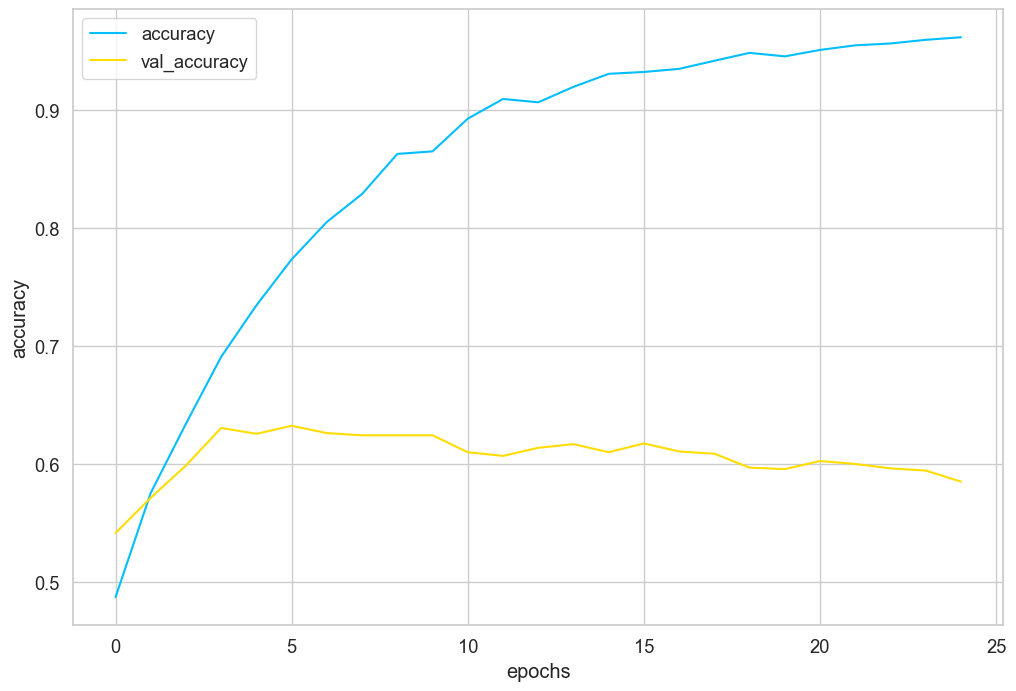

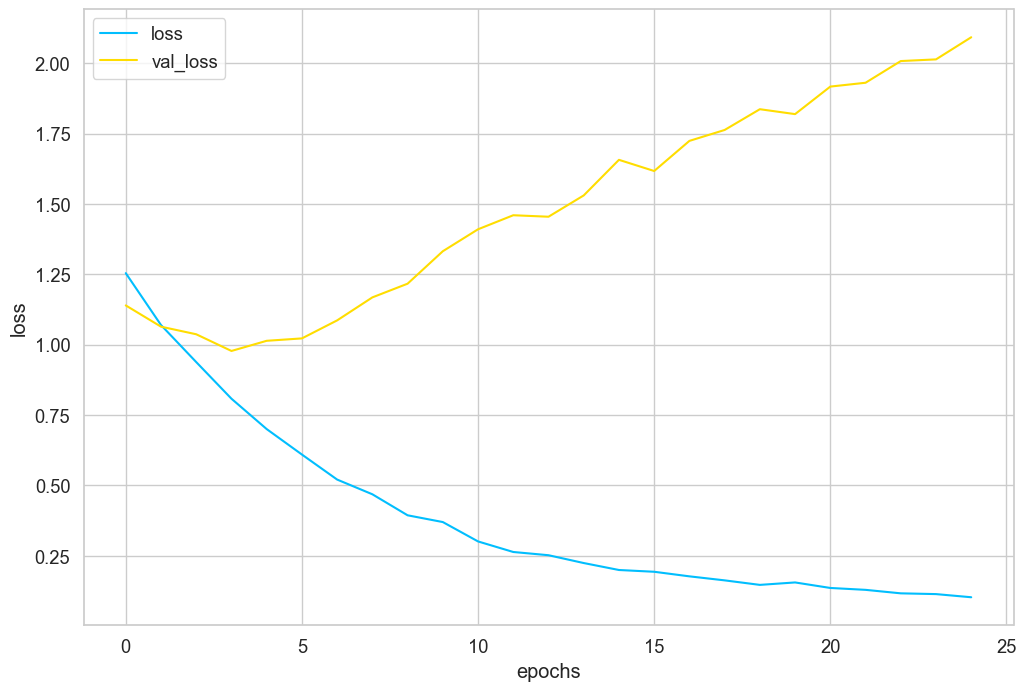

In [44]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")